In [35]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [37]:
df = pd.read_csv("Housing.csv")

In [39]:
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,3,yes,no,no,2,furnished,13300000
1,8960,4,4,4,yes,no,no,3,furnished,12250000
2,9960,3,2,2,yes,no,yes,2,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,2,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,2,unfurnished,1820000
541,2400,3,1,1,no,no,no,0,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,0,unfurnished,1750000
543,2910,3,1,1,no,no,no,0,furnished,1750000


In [41]:
df = df.drop(columns=['mainroad'])

In [43]:
df

,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,3,no,no,2,furnished,13300000
1,8960,4,4,4,no,no,3,furnished,12250000
2,9960,3,2,2,no,yes,2,semi-furnished,12250000
3,7500,4,2,2,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,2,furnished,11410000
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,no,yes,2,unfurnished,1820000
541,2400,3,1,1,no,no,0,semi-furnished,1767150
542,3620,2,1,1,no,no,0,unfurnished,1750000
543,2910,3,1,1,no,no,0,furnished,1750000


In [45]:
df.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
guestroom           0
basement            0
parking             0
furnishingstatus    0
price               0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
#Label Encoding
df.guestroom = le.fit_transform(df.guestroom)
df.basement = le.fit_transform(df.basement)
df.furnishingstatus = le.fit_transform(df.furnishingstatus)

In [51]:
df

,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,3,0,0,2,0,13300000
1,8960,4,4,4,0,0,3,0,12250000
2,9960,3,2,2,0,1,2,1,12250000
3,7500,4,2,2,0,1,3,0,12215000
4,7420,4,1,2,1,1,2,0,11410000
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,2,2,1820000
541,2400,3,1,1,0,0,0,1,1767150
542,3620,2,1,1,0,0,0,2,1750000
543,2910,3,1,1,0,0,0,0,1750000


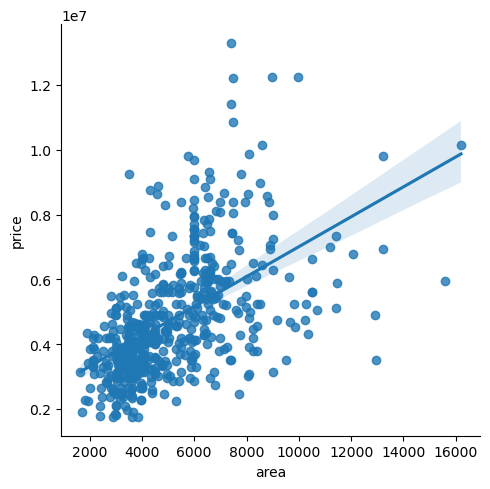

In [53]:
sns.lmplot(x='area', y='price', data=df)

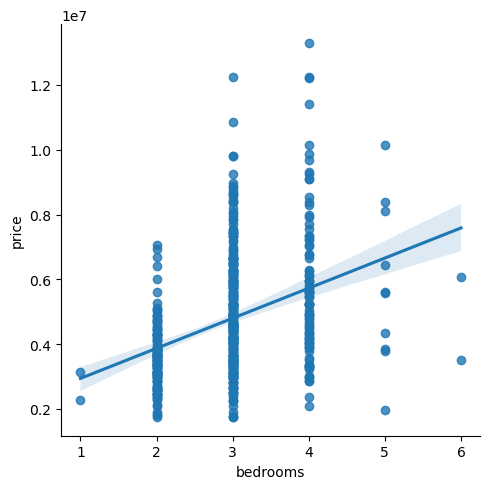

In [55]:
sns.lmplot(x='bedrooms', y='price', data=df)

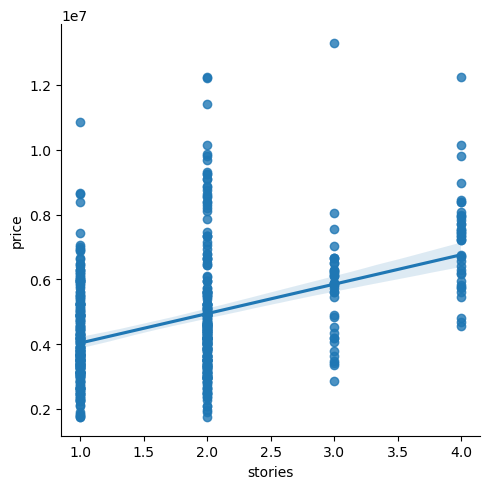

In [57]:
sns.lmplot(x='stories', y='price', data=df)

In [59]:
#data retrival
x = df.iloc[:,0:8]
x

,area,bedrooms,bathrooms,stories,guestroom,basement,parking,furnishingstatus
0,7420,4,2,3,0,0,2,0
1,8960,4,4,4,0,0,3,0
2,9960,3,2,2,0,1,2,1
3,7500,4,2,2,0,1,3,0
4,7420,4,1,2,1,1,2,0
...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,2,2
541,2400,3,1,1,0,0,0,1
542,3620,2,1,1,0,0,0,2
543,2910,3,1,1,0,0,0,0


In [61]:
y = df.iloc[:,8]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [67]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred = reg.predict(x_test)
y_pred

array([ 3234705.84976647,  4000628.62416071,  6628312.76958093,
        4096822.91186366,  7447488.67848708,  7264477.08075052,
        3940178.485606  ,  3710465.37252372,  5331133.62338657,
        2653443.67408048,  4420739.70377815,  2625963.15674891,
        3795237.89246272,  3869705.83725923,  5660550.59913185,
        3199759.41535097,  7238937.03415157,  5488532.79997486,
        5688394.14437543,  4718890.89120039,  2624346.6557294 ,
        2391570.50892077,  6989737.05821259,  4806246.28693724,
        5828231.94941911,  5106097.07950738,  3744218.91280122,
        4137807.90096811,  3026570.49641353,  4144687.02584815,
        4119869.68421063,  5734758.89327639,  6170986.268201  ,
        5567624.21399461,  7579401.62834475,  5906474.59833415,
        5685535.97736338,  2888882.99658318,  5315957.29887047,
        4832930.12061757,  4490618.2440221 ,  6166138.43642331,
        2992230.69684081,  5315945.51337799,  5799572.46941896,
        7167823.75389025,  9626817.99703

In [75]:
# r squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6757548981909478